In [41]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [48]:
class Car:
    '''
    Car object
    '''
    pass

In [108]:
def __init__(self, id:int, velocity: float, position: float, delta_t:float, d_min: float, max_speed: float = 105.0,front_car = None, aggressive_driver: bool = False, a_min: float = -2.0, a_max: float = 3.0, a_emer: float = 5.0):
        '''
        Constructor for car class.

        Args:
        id: int representing the identity number for each car
        velocity: float representing the car's velocity.
        position: float representing the current position of the car
        delta_t: float seconds representing the time step.
        d_min: float in km representing the minimal distance required between front car.
        max_speed: float km/h representing the speed limit (default 105 km/hour) on the road.
        front_car: Car object (default None) representing the car in front.
        aggressive_driver: boolean default False) representing if it is true that the car's driver is aggressive driver.
        #######a_min: float (default -2.0 km/h/s)representing the maximum confortable deceleration.
        #######a_max: float (default 3.0 km/h/s) representing the maximum comfortable acceleration.
        #######a_emer: float (default 5.0 km/h/s) representing maximum emergency deceleration that a car is able to drive on safety.
        '''
        self.id = id
        self.velocity = velocity
        self.position = position
        self.delta_t = delta_t
        self.d_min = d_min
        self.max_speed = max_speed
        self.front_car = front_car
        self.aggressive_driver = aggressive_driver
        self.a_min = a_min
        self.a_max = a_max
        self.a_emer = a_emer

Car.__init__ = __init__

CALCULATING SECOND RULE OF COMFORT USING CUBIC FUNCTION
- All kinds of safety distances required by the downhill section are the largest, followed by the corresponding flat section, and the smallest on the uphill section.
- The cubic function ensures smooth transitions between different road slopes. It allows customization for aggressive vs. non-aggressive drivers.
- sc =c⋅(road_grade)^3 + t, where c is cubic constant, t is baseline comfort time driving on flat road. (3.0s for non-aggressive drivers, 2.0s for aggressive drivers)
- It includes the following cases:
    - flat/road grade = 0, non-aggressive drivers keep sec_rule_comfort 3.0 seconds and aggressive drivers keep 2.0 seconds.
    - uphill/ up to road grade = 40%, non-aggressive drivers keep sec_rule_comfort 2.0 seconds and aggressive drivers keep 1.0 seconds.
    - downhill/ up to road grade = -40%, non-aggressive drivers keep sec_rule_comfort 5.0 seconds and aggressive drivers keep 3.0 seconds.

In [109]:
def compute_cubic_constant(self,x:float , y: float, t:float):
    '''
    calculate the cubic constant for the following formula:
        c⋅x^3 + t = y
        
    Args:
        x: float representing the maximum road_grade.
        y: float representing expected second rule of space.
        t: float = 3.0 second rule of space when driving on flat ground.

    Return:
        c: float representing the computed constant.
    '''
    return (y - t) / (x ** 3)

Car.compute_cubic_constant = compute_cubic_constant

In [110]:
def compute_second_rule_comfort_cubic(self,road_grade:float):
        '''
        Calculate the second rule of space comfort driving on different road grade.
        s_c = c * x ^ 3 + t
    
        Args:
            road_grade: float representing rise over run(vertical change divided by horizontal distance) where positive representing uphill and negative representing downhill.
            t: float = 3.0 second rule of space comfortable driving when driving on flat.
    
        Returns:
            sec_rule_comfort: second rule of space that the car is comfortable driving.
        '''

        #Case 1 & 2: road grade = 40 uphill, aggressive driver would takes 1 second and non-aggressive drivers would take 2 seconds
        if road_grade >0:
            x = 40
            y = 2.0 if not self.aggressive_driver else 1.0
            
        #Case 3 & 4: road grade = 40 downhill, aggressive driver would take 3 seconds and non-aggressive drivers would take 3 seconds.
        else:
            x = -40
            y = 5.0 if not self.aggressive_driver else 3.0   
            
        #Case 5 & 6: road grade = 0, aggressive driver would take 2 seconds and non-aggressive drivers would take 2 seconds.
        t = 3.0 if not self.aggressive_driver else 2.0
        
        c = self.compute_cubic_constant(x, y, t)
    
        # Apply cubic function formula: s_c = c * road_grade^3 + t
        sec_rule_comfort = c * (road_grade ** 3) + t
        return sec_rule_comfort

Car.compute_second_rule_comfort_cubic = compute_second_rule_comfort_cubic

EXAMPLES

In [111]:
car1 = Car(id = 1, velocity = 42.0, position = 10.0, delta_t = 1.0, d_min = 0.001, max_speed = 45.0, front_car = None, aggressive_driver= False, a_min = -2.0, a_max = 3.0, a_emer = 5.0)
car2 = Car(id = 2, velocity = 45.0, position = 2.0, delta_t = 1.0, d_min = 0.001, max_speed = 45.0, front_car = car1, aggressive_driver= True, a_min = -2.0, a_max = 3.0, a_emer = 5.0)
'''
for rg in range(-40, 41):
    second_rule_comfort = car1.compute_second_rule_of_space_cubic(rg)
    print(f"road grade: {rg}")
    print(f"second rule of comfort: {second_rule_comfort}")
'''   

# Initialize previous value for computing change
previous_s_c1 = None
previous_s_c2 = None

# Print table header
print(f"{'road_grade':>12} | {'sec_comfort_car1_non-aggressive':>26} | {'change':>10} | {'sec_comfort_car2_aggressive':>26}  | {'change':>10}")
print("-" * 100)

# Iterate correctly through road grades from -40% to 40%
for rg in range(-40, 41):  
    second_rule_comfort1 = car1.compute_second_rule_comfort_cubic(rg)
    second_rule_comfort2 = car2.compute_second_rule_comfort_cubic(rg)

    # Compute the change in `s_c` from the previous row
    change_in_s_c1 = second_rule_comfort1 - previous_s_c1  if previous_s_c1  is not None else None
    change_in_s_c2 = second_rule_comfort2 - previous_s_c2  if previous_s_c2  is not None else None
    
     # Compute the change in `s_c` from the previous row
    change_in_s_c1 = second_rule_comfort1 - previous_s_c1 if previous_s_c1 is not None else None
    change_in_s_c2 = second_rule_comfort2 - previous_s_c2 if previous_s_c2 is not None else None

    # Print the table with proper formatting
    print(f"{rg:>12} | {second_rule_comfort1:>26.10f} | {round(change_in_s_c1,10) if change_in_s_c1 is not None else '-':>10} | {second_rule_comfort2:>26.10f} | {round(change_in_s_c2,10) if change_in_s_c2 is not None else '-':>10}")

    # Update previous_s_c for the next iteration
    previous_s_c1 = second_rule_comfort1
    previous_s_c2 = second_rule_comfort2


  road_grade | sec_comfort_car1_non-aggressive |     change | sec_comfort_car2_aggressive  |     change
----------------------------------------------------------------------------------------------------
         -40 |               5.0000000000 |          - |               3.0000000000 |          -
         -39 |               4.8537187500 | -0.14628125 |               2.9268593750 | -0.073140625
         -38 |               4.7147500000 | -0.13896875 |               2.8573750000 | -0.069484375
         -37 |               4.5829062500 | -0.13184375 |               2.7914531250 | -0.065921875
         -36 |               4.4580000000 | -0.12490625 |               2.7290000000 | -0.062453125
         -35 |               4.3398437500 | -0.11815625 |               2.6699218750 | -0.059078125
         -34 |               4.2282500000 | -0.11159375 |               2.6141250000 | -0.055796875
         -33 |               4.1230312500 | -0.10521875 |               2.5615156250 | -0.05260937

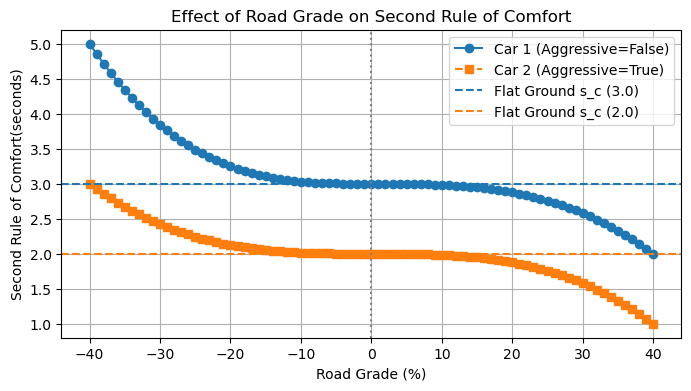

In [112]:
def plot_second_rule_comfort_cubic(car1, car2):
    road_grades = np.arange(-40, 41, 1)  
    s_c_values_car1 = [car1.compute_second_rule_comfort_cubic(rg) for rg in road_grades]
    s_c_values_car2 = [car2.compute_second_rule_comfort_cubic(rg) for rg in road_grades]

    # Plot both cars
    plt.figure(figsize=(8, 4))
    # Plot both cars and store the Line2D objects
    line1, = plt.plot(road_grades, s_c_values_car1, marker='o', linestyle='-', label=f"Car {car1.id} (Aggressive={car1.aggressive_driver})")
    line2, = plt.plot(road_grades, s_c_values_car2, marker='s', linestyle='--', label=f"Car {car2.id} (Aggressive={car2.aggressive_driver})")

    # Extract colors assigned to the lines
    color1 = line1.get_color()
    color2 = line2.get_color()

    # Labels and title
    plt.xlabel("Road Grade (%)")
    plt.ylabel("Second Rule of Comfort(seconds)")
    plt.title("Effect of Road Grade on Second Rule of Comfort")
    plt.axhline(y=3.0, color=color1, linestyle='--', label="Flat Ground s_c (3.0)")
    plt.axhline(y=2.0, color=color2, linestyle='--', label="Flat Ground s_c (2.0)")
    plt.axvline(x=0, color='gray', linestyle=':')
    plt.legend()
    plt.grid(True)
    
    # Show plot
    plt.show()

# Call the function to plot for both cars
plot_second_rule_comfort_cubic(car1, car2)

SECOND RULES:
- sec_rule: seconds representing the time for a Car to reach its neighbor.
- sec_rule_comfort: seconds representing the second rule of space for which car is comfortable driving when acceleartion = 0.
- sec_rule_min: seconds representing the second rule of space associated with car need to decelerate by at least a_min to ensure maintaining a distance of at least d_min from front car.
- sec_rule_emer: seconds representing the second rule of space associated with car need to decelerate by a_emer to ensure maintain a distance of d_min from front car.


In [113]:
def convert_time_from_hours_to_seconds(self, second_rule_in_hours: float):
        """
        Convert second rule from hours to seconds.
        
        Args:
            second_rule_in_hours: float representing the second rule in hours
        
        Returns:
            float representing time in seconds
        """
        
        return second_rule_in_hours*3600

Car.convert_time_from_hours_to_seconds = convert_time_from_hours_to_seconds

In [114]:
def convert_acceleration_from_m_s2_to_km_h2(self, acc_in_m_s2: float):
        """
        Convert second rule from hours to seconds.
        
        Args:
            acc_in_m_s2: float representing the acceleration in m/s2
        
        Returns:
            float representing the acceleration in km/h2
        """
        
        return acc_in_m_s2*12960

Car.convert_acceleration_from_m_s2_to_km_h2 = convert_acceleration_from_m_s2_to_km_h2

In [115]:
def compute_sec_rule(self, neighbor_position:float, low_speed: float = 0.1):
    '''
    Compute the time in seconds needed for a car to reach its front car.

    We compute the second rule s for car i as the ratio of the distance between car i and its neighbor and the speed of 
    the Car. We convert s to seconds as the acceleration function a(s) requires s to be in seconds.
        
    Args:
        neighbor_position: float representing the position of the front car.
        low_speed: float = 0.1 m/h representing the lower speed of the current car.
    Returns:
        float in seconds representing the amount of time in seconds needed for a car to reach its neighbor.
    '''

    if self.velocity == 0:
        return self.convert_time_from_hours_to_seconds((neighbor_position - self.position) / low_speed)
    else:
        return self.convert_time_from_hours_to_seconds((neighbor_position - self.position) / self.velocity)

#Extend the class to include the method in the Car class
Car.compute_sec_rule = compute_sec_rule

In [116]:
def compute_sec_rule_min(self, neighbor_velocity: float, neighbor_acceleration: float, low_speed: float = 0.1):
        """
        Compute second rule associated with car i needing to decelerate by at least
        a_min to ensure maintaining at least a distance of d_min from car i-1.
        
        Args:
            neighbor_velocity: float representing the velocity of the front car
            neighbor_acceleration: float representing the acceleration of the front car
        
        Returns:
            float representing the second rule associated with car i needing to 
            decelerate by at least a_min to ensure maintaining at least a distance 
            of d_min from car i-1
        """
        
        if self.velocity == 0:
            return self.convert_time_from_hours_to_seconds(self.convert_acceleration_from_m_s2_to_km_h2(self.a_min)* (self.delta_t**2)/2 
        - neighbor_velocity*self.delta_t
        - self.convert_acceleration_from_m_s2_to_km_h2(neighbor_acceleration)* (self.delta_t**2)/2 
        + low_speed*self.delta_t + self.d_min)/low_speed
        else:
            return self.convert_time_from_hours_to_seconds(self.convert_acceleration_from_m_s2_to_km_h2(self.a_min)* (self.delta_t**2)/2 
        - neighbor_velocity*self.delta_t 
        - self.convert_acceleration_from_m_s2_to_km_h2(neighbor_acceleration)* (self.delta_t**2)/2 
        + self.velocity*self.delta_t + self.d_min)/self.velocity

#Extend the class to include the method in the Car class
Car.compute_sec_rule_min = compute_sec_rule_min

In [117]:
def compute_sec_rule_emer(self, neighbor_velocity: float, neighbor_acceleration: float, low_speed = 0.1):
        """
        Compute second rule associated with car i needing to decelerate by at least
        -a_emer to ensure maintaining at least a distance of d_min from car i-1.
        
        Args:
            neighbor_velocity: float representing the velocity of the front car
            neighbor_acceleration: float representing the acceleration of the front car
        
        Returns:
            float representing the second rule associated with the case where the maximum 
                acceleration/deceleration possible to keep the minimal distance between consecutive 
                cars is the maximum deceleration possible
        """
        if self.velocity == 0:
            return self.convert_time_from_hours_to_seconds(self.convert_acceleration_from_m_s2_to_km_h2(-self.a_emer)* (self.delta_t**2)/2 
        - neighbor_velocity*self.delta_t 
        - self.convert_acceleration_from_m_s2_to_km_h2(neighbor_acceleration)* (self.delta_t**2)/2 
        + low_speed*self.delta_t + self.d_min)/low_speed
        else:
            return self.convert_time_from_hours_to_seconds(self.convert_acceleration_from_m_s2_to_km_h2(-self.a_emer)* (self.dt**2)/2 
        - neighbor_velocity*self.delta_t
        - self.convert_acceleration_from_m_s2_to_km_h2(neighbor_acceleration)* (self.delta_t**2)/2 
        + self.velocity*self.delta_t + self.d_min)/self.velocity

#Extend the class to include the method in the Car class
Car.compute_sec_rule_emer = compute_sec_rule_emer

ACCELERATION MODELING: 
- accel_linear: sec_rule_emergency <= sec_rule < sec_rule_min. acceleration of a Car for second rules smaller than sec_rule_min, that is cases where a driver is breaking uncomfortably.In such cases, a person would always try to minimize its breaking as breaking more would be even more uncomfortable. We use a linear function between the points (sec_rule_min, a_min) and (sec_rule_emergency, -a_emer) as the max acceleration vs second rule is a linear function
- accel_logistic: sec_rule > sec_rule_min. acceleration of a Car for second rules larger than sec_rule_min following the logistic function that models how a Car would accelerate depending on how fast it is driving, how far the Car in front is and how strongly the Car in front is decelerating/accelerating.

In [118]:
def compute_accel_linear(self, neighbor_position: float, neighbor_velocity: float, neighbor_acceleration: float):
        """
        Compute acceleration for second rules smaller than
            sec_rule_min according to the linear model.
            
        Args:
            neighbor_position: float representing the position of the front car
            neighbor_velocity: float representing the velocity of the front car
            neighbor_acceleration: float representing the acceleration of the front car
        
        Returns:
            float representing the acceleration of a Car for second rules smaller than 
                sec_rule_min, that is cases where a driver is breaking uncomfortably.
                In such cases, a person would always try to minimize its breaking as breaking
                more would be even more uncomfortable. We use a linear function between the 
                points (sec_rule_min, a_min) and (sec_rule_emergency, -a_emer) as the
                max acceleration vs second rule is a linear function
        """
        
        sec_rule_min = self.compute_sec_rule_min(neighbor_velocity, neighbor_acceleration)
        sec_rule_emer = self.compute_sec_rule_emer(neighbor_velocity, neighbor_acceleration)
                
        slope = (self.a_min + self.a_emer)/(sec_rule_min - sec_rule_emer)
        intercept = (-self.a_min * sec_rule_emer - sec_rule_min * self.a_emer)/(sec_rule_min - sec_rule_emer)
    
        return slope * self.compute_sec_rule(neighbor_position) + intercept


#Extend the class to include the method in the Car class
Car.compute_accel_linear = compute_accel_linear

In [119]:
def compute_distance_to_front(self, neighbor_position: float):
        """
        Compute distance between the Car instance and its neighbor.
        
        Args:
            neighbor_position: float representing the position of the front car
        
        Returns:
            float representing distance between the Car instance and its neighbor
        """

        return neighbor_position - self.position

#Extend the class to include the method in the Car class
Car.compute_distance_to_front = compute_distance_to_front

In [120]:
def compute_acc_look_ahead(self, neighbor_position: float, neighbor_velocity: float, neighbor_acceleration: float, K: float = 1.05):
        """
        Compute the acceleration for newly inserted cars using a look ahead strategy 
                
        Args:
            neighbor_position: float representing the position of the front car
            neighbor_velocity: float representing the velocity of the front car
            neighbor_acceleration: float representing the acceleration of the front car
            K: float representing the decay in the second rule to ensure a gradual decrease
                in speed
        
        Returns:
            float representing the acceleration needed to ensure that s_i^{t+1} = K*s_i^t
             ensuring that that the car slows down gradually
        """

        accel_look_ahead_num = self.velocity*((1-K)*self.compute_distance_to_front(neighbor_position) + 
                                              (neighbor_velocity - self.velocity)*self.delta_t + 
                                              neighbor_acceleration*(self.delta_t**2)/2)
    
        accel_look_ahead_denom = K*self.delta_t*self.compute_distance_to_front(neighbor_position) + self.velocity*(self.delta_t**2)/2
                       
        return (accel_look_ahead_num/accel_look_ahead_denom)/12960

#Extend the class to include the method in the Car class
Car.compute_acc_look_ahead = compute_acc_look_ahead

In [121]:
def compute_accel_logistic(self, neighbor_position: float, neighbor_velocity: float, neighbor_acceleration: float, road_grade: float, eps: float = 0.01):
        """
        Compute acceleration for second rules larger than
            sec_rule_min according to the logistic model.
            
        Args:
            neighbor_position: float representing the position of the front car
            neighbor_velocity: float representing the velocity of the front car
            neighbor_acceleration: float representing the acceleration of the front car
            
        Parameters:
            low_asymp: float representing the lower asymptote.
            up_asymp: float representing the upper asymptote.
            Q: float computed to make sure that at the critical second rule, the 
                function value is 0.
            growth_rate: float representing the slope of the "linear" part in the logistic function
        
        Returns:
            float representing the acceleration of a Car for second rules larger than 
                sec_rule_min following the logistic function that models how a Car 
                would accelerate depending on how fast it is driving, how far the Car 
                in front is and how strongly the Car in front is decelerating/accelerating.
        """
        
        low_asymp = self.a_min - eps
        up_asymp = self.a_max
        Q = (up_asymp - low_asymp)*(1/eps)
        sec_rule_min = self.compute_sec_rule_min(neighbor_velocity, neighbor_acceleration)

        #Update the sec_rule_comfort from a floating parameter in Car class to a function.
        sec_rule_comfort = self.compute_second_rule_comfort_cubic(road_grade)
    
        if (self.velocity > neighbor_velocity) and (self.velocity != 0) and (self.compute_sec_rule(neighbor_position) > sec_rule_comfort):
            return self.compute_acc_look_ahead(neighbor_position, neighbor_velocity, neighbor_acceleration)
        '''
        else:
            sec_rule_crit = self.sec_rule_crit_comfort
        '''
    
        growth_rate = np.log(self.a_max/(-Q*low_asymp))/(sec_rule_min - sec_rule_comfort)

        return low_asymp + (up_asymp-low_asymp)/(1+ Q*np.exp(-growth_rate*(self.compute_sec_rule(neighbor_position)-sec_rule_min)))

#Extend the class to include the method in the Car class
Car.compute_accel_logistic = compute_accel_logistic

In [122]:
def compute_acceleration(self, neighbor_position: float, neighbor_velocity: float, neighbor_acceleration: float, road_grade: float):
        """
        Compute the acceleration of a Car using either the linear 
            or logistic function.

        Args:
            neighbor_position: float representing the position of the front car
            neighbor_velocity: float representing the velocity of the front car
            neighbor_acceleration: float representing the acceleration of the front car
            
        If car i has a neighbor, we use our model a(s) to find the acceleration.
        Otherwise, car i keeps on accelerating until reaching the max speed and
        having an acceleration of 0. We check that both cars i and i-1 are driving
        at max speed before setting a_i^t = 0. The last if statement is included
        to take care of floating point errors.
        
        Returns:
            float representing the acceleration based on either the logistic or
                linear function, depending on the sec_rule
        """
        
        if self.neighbor is None:
            if self.velocity < self.max_speed:
                acceleration = self.a_max
            else:
                acceleration = 0
        else:
            if self.velocity == self.max_speed and neighbor_velocity == self.max_speed:
                acceleration = 0
            else:
                sec_rule = self.compute_sec_rule(neighbor_position)
                sec_rule_min = self.compute_sec_rule_min(neighbor_velocity, neighbor_acceleration)
                sec_rule_emer = self.compute_sec_rule_emer(neighbor_velocity, neighbor_acceleration)
                
                if (sec_rule <= sec_rule_min and sec_rule >= sec_rule_emer):
                    acceleration = self.compute_accel_linear(neighbor_position, neighbor_velocity, neighbor_acceleration)

                elif sec_rule < sec_rule_emer:
                    acceleration = -self.a_emer
                    print("Cars had to be within d_min as the max deceleration was not enough to keep a distance of at least d_min")
                else:
                    acceleration = self.compute_accel_logistic(neighbor_position, neighbor_velocity, neighbor_acceleration, road_grade)
                    
                    
        if np.abs(acceleration) < 10**(-5):
            acceleration = 0
            
        return acceleration

#Extend the class to include the method in the Car class
Car.compute_acceleration = compute_acceleration

SECOND RULE OF COMFORT USING LINEAR APPROACH

In [86]:
def compute_second_rule_of_comfort_linear(road_grade: float):
    '''
    compute the second rule of space for which the car is comfortable driving.
    TO DISUCSS: UNABLE TO FIND THE REFERENCE TO SUPPORT THE CHANGE OF SLOPE AND SC.
    
    Args:
        road_grade: floating represent rise over run(vertical change divided by horizontal distance) where positive representing uphill and negative representing downhill.

    Returns:
        s_c: second rule of space that the car is comfortable driving.
    '''
    #Base: 3-second rule on flat ground
    s_c_flat = 3.0

    #Case1: Increase second rule of space by 0.5 seconds per 5% grade drop on downhill
    if road_grade < -5:
        s_c = s_c_flat + 0.5 * ((abs(road_grade) - 5) /5)
    #Case2: Decrease second rule of space by 0.1 seconds per every 5% increase on uphill.
    elif road_grade > 5:
        s_c = s_c_flat - 0.1 * (((road_grade) - 5) /5)
    #Case3: maintain 3 seconds rule of space between -5% to 5% grade.
    else:
        s_c = s_c_flat

    #ensure the s_c does not go below the second of rule of emergency (1.5 s).
    #s_c = max(s_c, 1.5)

    return s_c


# Initialize previous value for computing change
previous_s_c = None

# Print table header
print(f"{'road_grade':>12} | {'second_rule_of_space':>22} | {'change':>10}")
print("-" * 50)

# Iterate correctly through road grades from -40% to 40%
for rg in range(-40, 41):  
    s_c = compute_second_rule_of_comfort_linear(rg)

    # Compute the change in `s_c` from the previous row
    change_in_s_c = s_c - previous_s_c if previous_s_c is not None else None

    # Print the table
    if change_in_s_c is None:
        print(f"{rg:>12} | {s_c:>22.10f} | {'-':>10}")  # First row has no previous value
    else:
        print(f"{rg:>12} | {s_c:>22.10f} | {change_in_s_c:>10.10f}")
    
    # Update previous_s_c for the next iteration
    previous_s_c = s_c

  road_grade |   second_rule_of_space |     change
--------------------------------------------------
         -40 |           6.5000000000 |          -
         -39 |           6.4000000000 | -0.1000000000
         -38 |           6.3000000000 | -0.1000000000
         -37 |           6.2000000000 | -0.1000000000
         -36 |           6.1000000000 | -0.1000000000
         -35 |           6.0000000000 | -0.1000000000
         -34 |           5.9000000000 | -0.1000000000
         -33 |           5.8000000000 | -0.1000000000
         -32 |           5.7000000000 | -0.1000000000
         -31 |           5.6000000000 | -0.1000000000
         -30 |           5.5000000000 | -0.1000000000
         -29 |           5.4000000000 | -0.1000000000
         -28 |           5.3000000000 | -0.1000000000
         -27 |           5.2000000000 | -0.1000000000
         -26 |           5.1000000000 | -0.1000000000
         -25 |           5.0000000000 | -0.1000000000
         -24 |           4.9000000000

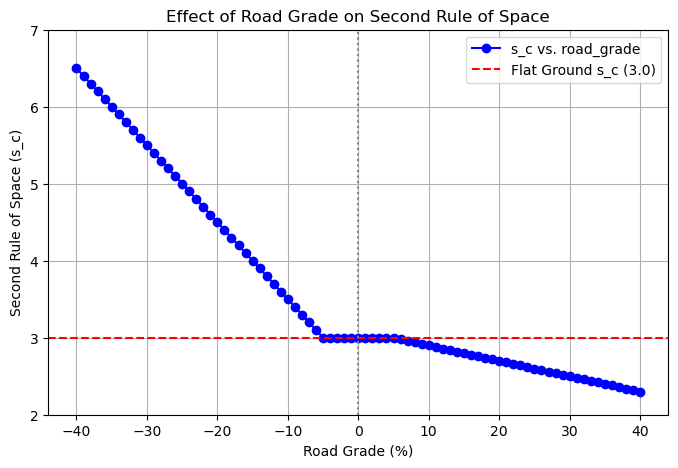

In [87]:
def plot_second_rule_linear():
    # Generate road grade values from -40 to 40
    road_grades = np.arange(-40, 41, 1)  # Range from -40 to 40 in steps of 1
    s_c_values = [compute_second_rule_of_comfort_linear(rg) for rg in road_grades]

    # Create the plot
    plt.figure(figsize=(8, 5))
    plt.plot(road_grades, s_c_values, marker='o', linestyle='-', color='b', label="s_c vs. road_grade")

    #set y-axis limits explicitly
    plt.ylim(2,7)
    
    # Labels and title
    plt.xlabel("Road Grade (%)")
    plt.ylabel("Second Rule of Space (s_c)")
    plt.title("Effect of Road Grade on Second Rule of Space")
    plt.axhline(y=3.0, color='r', linestyle='--', label="Flat Ground s_c (3.0)")  # Reference line for flat ground
    plt.axvline(x=0, color='gray', linestyle=':')  # Vertical line at road grade 0
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()

#call the function
plot_second_rule_linear()

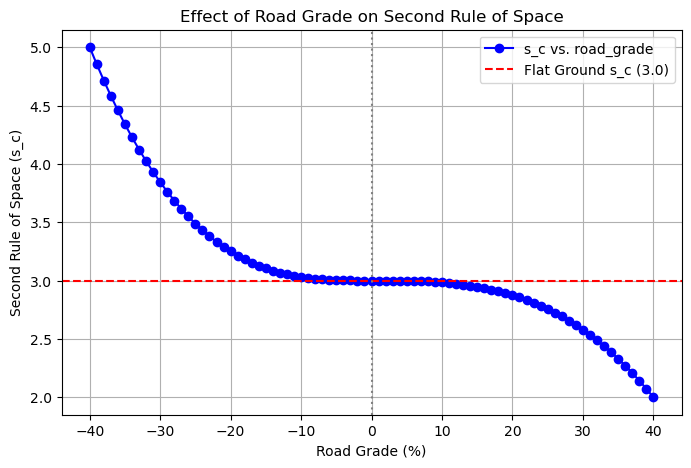

In [30]:
def plot_second_rule_cubic():
    # Generate road grade values from -40 to 40
    road_grades = np.arange(-40, 41, 1)  # Range from -40 to 40 in steps of 1
    s_c_values = [compute_second_rule_of_space_cubic(rg) for rg in road_grades]

    # Create the plot
    plt.figure(figsize=(8, 5))
    plt.plot(road_grades, s_c_values, marker='o', linestyle='-', color='b', label="s_c vs. road_grade")

    # Labels and title
    plt.xlabel("Road Grade (%)")
    plt.ylabel("Second Rule of Space (s_c)")
    plt.title("Effect of Road Grade on Second Rule of Space")
    plt.axhline(y=3.0, color='r', linestyle='--', label="Flat Ground s_c (3.0)")  # Reference line for flat ground
    plt.axvline(x=0, color='gray', linestyle=':')  # Vertical line at road grade 0
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()

#call the function
plot_second_rule_cubic()

In [31]:
def convert_road_grade_to_angle(road_grade: float):
    '''
    Convert road grade (%) to incline angle in degrees.
    Formula: θ = arctan(grade / 100)

    Args:
        road_grade: floating represent rise over run(vertical change divided by horizontal distance) where positive representing uphill and negative representing downhill.

    Return:
        float: representing the incline angle in degrees.
    '''
    return math.degrees(math.atan(road_grade /100))

#test with examples
road_grades = [1.0, 5.0, 10.0, 20.0, 30.0, 40.0]

for rg in road_grades:
    angle = convert_road_grade_to_angle(rg)
    print(f"road_grade {rg}% convert to angle:{angle:.10f}")
    

road_grade 1.0% convert to angle:0.5729386977
road_grade 5.0% convert to angle:2.8624052261
road_grade 10.0% convert to angle:5.7105931375
road_grade 20.0% convert to angle:11.3099324740
road_grade 30.0% convert to angle:16.6992442340
road_grade 40.0% convert to angle:21.8014094864


In [3]:
def convert_road_grade_to_radians(road_grade: float):
    return math.atan(road_grade / 100)

#test with examples
road_grades = [1.0, 5.0, 10.0, 20.0, 30.0, 40.0]

for rg in road_grades:
    angle = convert_road_grade_to_radians(rg)
    print(f"road_grade {rg}% convert to radians:{angle:.10f}")

road_grade 1.0% convert to radians:0.0099996667
road_grade 5.0% convert to radians:0.0499583957
road_grade 10.0% convert to radians:0.0996686525
road_grade 20.0% convert to radians:0.1973955598
road_grade 30.0% convert to radians:0.2914567945
road_grade 40.0% convert to radians:0.3805063771


In [42]:
#Test compute_time_reach_front_car function
car1 = Car(id = 1, velocity = 40.0, position = 40.15)
car2 = Car(id = 2, velocity = 40.0, position = 40.0, front_car = car1)
time_to_reach = car2.compute_time_reach_front_car(car1.position)
print(f"Time to reach front car: {time_to_reach:.2f} seconds.")

Time to reach front car: 13.50 seconds



CALCULATION OF ACCELERATION FROM EXTRA FORCE ON UPHILL/DOWNWHILL
- Approach 1: Using gravity and normal force

In [83]:
def compute_acceleration_extra_force(road_grade: float, mu_k: float = 0.75, gravity: float = 9.81):
    '''
    Compute the required acceleration/deceleartion on uphill/dowhill to maintain intial speed due to friction and normal force.

    Formula: 
        uphill: a = -g * (μk * cosθ + sinθ)
        downhill: a = g * (sinθ - μk * cosθ )

    Args:
        mu_k: float (0.01 - 0.15) representing rolling resistance of ordinary car tire on concrete
        road_grade: floating represent road grade.
        gravity: float representing gravitational acceleration 9.81 m/s².

    Return:
        float: m/s² representing the acceleration from extra force to maintain constant speed when driving uphill/downhill.
    '''
    #convert the road grade % to angle
    theta = convert_road_grade_to_radians(road_grade)

    #calculate the acceleration from extra force considering friction and normal force in uphills/downhills
    if road_grade >= 0:
        acc_extra_force =  -gravity * (mu_k * math.cos(theta) + math.sin(theta))
    else:
        acc_extra_force = gravity * ( math.sin(theta)- mu_k * math.cos(theta) )

    return acc_extra_force


road_grade -5.0
acc_extra_force -7.838208355513325
road_grade -3.75
acc_extra_force -7.719948817959311
road_grade -2.5
acc_extra_force -7.600375253729355
road_grade -1.25
acc_extra_force -7.4795406837080485
road_grade 0.0
acc_extra_force -7.3575
road_grade 1.25
acc_extra_force -7.4795406837080485
road_grade 2.5
acc_extra_force -7.600375253729355
road_grade 3.75
acc_extra_force -7.719948817959311
road_grade 5.0
acc_extra_force -7.838208355513325


'\nacc_extra_force1 = compute_acceleration_extra_force(road_grade = 20.0)\nacc_extra_force1 = compute_acceleration_extra_force(road_grade = 3.0)\nacc_extra_force2 = compute_acceleration_extra_force(road_grade = -10.0)\nacc_extra_force1 = compute_acceleration_extra_force(road_grade = -3.0)\nprint(f"Required acceleration is : {acc_extra_force1:.5f} m/s²")\nprint(f"Required acceleration is : {acc_extra_force2:.5f} m/s²")\n'

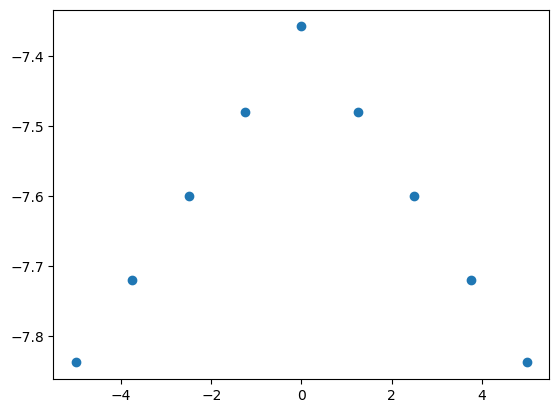

In [84]:
#Test the compute_acceleration_extra_force function
road_grade_vals = np.linspace(-5, 5, 9)
acc_extra_force_all = []
for road_grade in road_grade_vals:
    acc_extra_force = compute_acceleration_extra_force(road_grade = road_grade)
    acc_extra_force_all.append(acc_extra_force)
    print(f"road_grade {road_grade}")
    print(f"acc_extra_force {acc_extra_force}")
    
plt.scatter(road_grade_vals, acc_extra_force_all) 
'''
acc_extra_force1 = compute_acceleration_extra_force(road_grade = 20.0)
acc_extra_force1 = compute_acceleration_extra_force(road_grade = 3.0)
acc_extra_force2 = compute_acceleration_extra_force(road_grade = -10.0)
acc_extra_force1 = compute_acceleration_extra_force(road_grade = -3.0)
print(f"Required acceleration is : {acc_extra_force1:.5f} m/s²")
print(f"Required acceleration is : {acc_extra_force2:.5f} m/s²")
'''

CALCULATION OF ACCELERATION FROM EXTRA FORCE ON UPHILL/DOWNWHILL
- Approach 2: acceleration dropping by -0.05 to -0.075 mph/s (or -0.0224 m/s² to -0.0335m/s²) for every 1% increase of grade.
source: https://www.sciencedirect.com/science/article/abs/pii/S1361920918307260

In [57]:
def compute_acceleration_extra_force_approach2(delta_grade: float, theta_0_v: float = 0.0, theta_1_v: float = - 0.0224):
    '''
    Compute the required acceleration/deceleartion on uphill/dowhill to maintain intial speed due to friction and normal force.
    Approach 2: acceleration dropping by -0.05 to -0.075 mph/s (or -0.0224 m/s² to -0.0335m/s²) for every 1% increase of grade.
    Formula: 
        Accv   = θ_0_v  +  θ_1_v * Grade + εv 

    Args:
        theta_0_v: 0.0 m/s² float representing flat road acceleration
        theta_1_v: -0.0224 m/s² float representing acceleration reduction per 1% increase on grade.
        delta_grade: % change of the road grade. Position representing uphill and negative representing downhill.

    Return:
        float: m/s² representing the acceleration from extra force to maintain constant speed when driving uphill/downhill.
    '''
    acc_extra_force = theta_0_v + theta_1_v * delta_grade
    return - acc_extra_force 
    

In [58]:
#Test the compute_acceleration_extra_force_approach2 function
acc_extra_force = compute_acceleration_extra_force_approach2(delta_grade = 20.0)
print(f"Required acceleration is : {acc_extra_force:.5f} m/s²")

Required acceleration is : 0.44800 m/s²


In [ ]:
Acc = f(s_j^t, s_c)
Acc = f(s_j^t, s_c(inclination, driver behaviors wrt inclination))